['anger', 'fear', 'sadness', 'joy']
 Shape of X is  (3787, 1547)
 Shape of Y is  (4, 1547)
 Shape of m is  1547
 Shape of W1 is  (100, 3787)
 Shape of W2 is  (4, 100)
              precision    recall  f1-score   support

           0       0.07      0.27      0.11       112
           1       0.04      0.22      0.07        67
           2       0.12      0.26      0.16       174
           3       0.80      0.27      0.41      1194

   micro avg       0.27      0.27      0.27      1547
   macro avg       0.26      0.26      0.19      1547
weighted avg       0.64      0.27      0.34      1547

              precision    recall  f1-score   support

           0       0.63      0.36      0.46       715
           1       0.22      0.40      0.29       196
           2       0.39      0.43      0.41       346
           3       0.36      0.50      0.41       290

   micro avg       0.41      0.41      0.41      1547
   macro avg       0.40      0.42      0.39      1547
weighted avg      

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       432
           1       0.38      1.00      0.55       133
           2       0.93      0.74      0.82       488
           3       0.98      0.80      0.88       494

   micro avg       0.82      0.82      0.82      1547
   macro avg       0.81      0.85      0.79      1547
weighted avg       0.90      0.82      0.84      1547

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       472
           1       0.99      0.64      0.78       536
           2       0.59      0.98      0.73       229
           3       0.76      0.99      0.86       310

   micro avg       0.82      0.82      0.82      1547
   macro avg       0.82      0.86      0.81      1547
weighted avg       0.87      0.82      0.82      1547

              precision    recall  f1-score   support

           0       0.81      0.96      0.87       346
           1       0.

              precision    recall  f1-score   support

           0       1.00      0.96      0.97       428
           1       0.96      0.97      0.96       344
           2       0.94      0.97      0.95       373
           3       0.98      0.99      0.99       402

   micro avg       0.97      0.97      0.97      1547
   macro avg       0.97      0.97      0.97      1547
weighted avg       0.97      0.97      0.97      1547

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       411
           1       0.97      0.96      0.97       350
           2       0.96      0.96      0.96       385
           3       0.98      0.99      0.99       401

   micro avg       0.97      0.97      0.97      1547
   macro avg       0.97      0.97      0.97      1547
weighted avg       0.97      0.97      0.97      1547

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       420
           1       0.

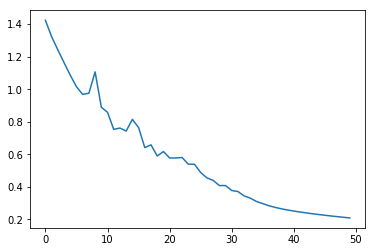

In [72]:
import os
import nltk
import numpy as np
import json
# For making a precision, recall report and confusion matrix on the classes
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
from nltk.stem.lancaster import LancasterStemmer
from string import punctuation
anger_training_set = []
fear_training_set = []
sadness_training_set = []
joy_training_set = []
stemmer = LancasterStemmer()
all_words=[]

# Here I am loading the dataset from stored folder. The training data is stored as text file and each tweet is accompanied
# by the magnitude of its sentiment (0 to 1). I had to go through the tweets myself and observed that a threshold of 0.5 is 
# good enough to classify a tweet according to its sentiment. Tweets with lesser threshold were not definitive to be trained as per their mentioned classification  
# I only read those tweets that have a dominant classification factor i.e. above 0.5
# Here i am setting each tweet's threshold magnitude accordingly
def load_training_data(sentiment):
    data = open("C:/Users/A8/Desktop/ML Project/datasets/"+sentiment+"_training_set.txt",encoding="utf8")
    if sentiment == "anger":        
        threshold = 0.5
    elif sentiment == "fear":
        threshold = 0.6
    elif sentiment == "sadness":
        threshold = 0.5
    elif sentiment == "joy":
        threshold = 0.5
    else:
        pass
    return data,threshold

# In this method, I am cleaning the tweet data removing punctuations and then tokenizing the words in tweet removing name tags
# and appending them to training set
def clean_data(training_data,threshold):
    training_set = []
    for line in training_data:
        line = line.strip().lower()
        intensity = float(line.split()[-1])
        if (intensity>=threshold):
            line = " ".join(filter(lambda x:x[0]!='@', line.split()))
            punct = line.maketrans("","",'.*%$^0123456789#!][\?&/)/(+-<>')
            result = line.translate(punct)
            tokened_sentence = nltk.word_tokenize(result)
            sentence = tokened_sentence[0:len(tokened_sentence)-1]
            label = tokened_sentence[-1]
            training_set.append((sentence,label))
    return training_set
    
# This method collects all the unique words that are contained in the entire tweet dataset     
def bag_of_words(all_data):
    training_set = []
    all_words = []
    for each_list in all_data:
        for words in each_list[0]:
            word = stemmer.stem(words)
            all_words.append(word)
    all_words = list(set(all_words))
    
    for each_sentence in all_data:  
        bag = [0]*len(all_words)
        training_set.append(encode_sentence(all_words,each_sentence[0],bag))
    return training_set,all_words

# Here we encode each tweet's words according to the words it contained from the bag of words which is based on all words in all tweets
def encode_sentence(all_words,sentence, bag):
    for s in sentence:        
        stemmed_word = stemmer.stem(s)
        for i,word in enumerate(all_words):
            if stemmed_word == word:
                bag[i] = 1
    return bag
    
    
def main():
    bag = [] 
    all_data = []
    labels = []
    classes = []
    
    ######### Here we read the whole training data for each class and the threshold we will use for its classification
    anger_training_data,threshold = load_training_data("anger")
    anger_training_set = clean_data(anger_training_data,threshold)
    
    fear_training_data,threshold = load_training_data("fear")
    fear_training_set = clean_data(fear_training_data,threshold)
    
    sadness_training_data,threshold = load_training_data("sadness")
    sadness_training_set = clean_data(sadness_training_data,threshold)
    
    joy_training_data,threshold = load_training_data("joy")
    joy_training_set = clean_data(joy_training_data,threshold)
    
    ###### In every training set above we have a nested list whose first element is sentence and 2nd element its respective label ######
    
#    print(anger_training_set[0][0],anger_training_set[0][1])
#    print(joy_training_set[0][0],joy_training_set[0][1])
    
    ###### Here we combine all training sets in one list ######
    all_data.extend(anger_training_set)
    all_data.extend(fear_training_set)
    all_data.extend(sadness_training_set)
    all_data.extend(joy_training_set)
    
    ###### Here we simply make a classification label list encoding our 4 classes as follows
    labels = []
    for i,j in all_data:
        if j == "anger":            
            labels.append([1,0,0,0])
        elif j == "fear":            
            labels.append([0,1,0,0])
        elif j == "sadness":            
            labels.append([0,0,1,0])
        elif j == "joy":            
            labels.append([0,0,0,1])
        else:
            pass
    classes = ["anger","fear","sadness","joy"]
    print(classes)
    np.set_printoptions(threshold=np.inf)
    words=[]
    
    # Here we will have the whole training set and the all the words contained in whole training set
    training_set,words = bag_of_words(all_data)
    
    # We convert our training set in a numpy array as it is required for calculations in neural net
    training_set = np.array(training_set)
    
    # We convert our labels in numpy array as it is required for calculations in neural net
    labels = np.array(labels)

    # It is important to shuffle dataset so your classifier does not attempt to memorize training set, this functions shuffles data and labels.
    shuffling_function = np.random.permutation(training_set.shape[0])
    shuffled_training_set, shuffled_labels = np.zeros((training_set.shape)),np.zeros((training_set.shape))
    shuffled_training_set,shuffled_labels= training_set[shuffling_function],labels[shuffling_function]
    
    ############# HERE WE HAVE A SHUFFLED DATASET WITH RESPECTIVE LABELS NOW WE HAVE TO TRAIN THIS DATA BOTH NUMPY ARRAYS ############
    Train_model(shuffled_training_set,shuffled_labels,words,classes)

# Method for calculating sigmoid
def sigmoid(z):
    return (1/(1+np.exp(-z)))
    
# Method for calculating relu
def relu(z):
    A = np.array(z,copy=True)
    A[z<0]=0
    assert A.shape == z.shape
    return A
    
# Method for calculating softmax
def softmax(x):
    num = np.exp(x-np.amax(x,axis=0,keepdims=True))    
    return num/np.sum(num,axis=0,keepdims=True)

# Method for calculating forward propagation
def forward_prop(n_x,n_h,n_y,m,X,W1,W2,b1,b2):
    # Forward propagate data ... dimensions should be 100x1547
    Z1 = np.dot(W1,X)+b1
    A1 = relu(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

# Method for calculating relu activation's derivative
def relu_backward(da,dz):
    da1 = np.array(da,copy=True)
    da1[dz<0]=0
    assert da1.shape == dz.shape
    return da1

# Method for calculating linear part of backward propagation
def linear_backward(dz,a,m,w,b):
    dw = (1/m)*np.dot(dz,a.T)
    db = (1/m)*np.sum(dz,axis=1,keepdims=True)
    da = np.dot(w.T,dz)
    assert (dw.shape==w.shape)
    assert (da.shape==a.shape)
    assert (db.shape == b.shape)
    return da,dw,db 

# Method for calculating loss function
def calculate_loss(Y,Yhat,m):
    loss = (-1/m)*np.sum(np.multiply(Y,np.log(Yhat)))
    return loss

# Method for back propagation
def back_prop(Z1,A1,Z2,A2,X,Y,W1,W2,b1,b2,learning_rate,m):
    dZ2 = A2-Y
    da1,dw2,db2 = linear_backward(dZ2,A1,m,W2,b2)
    dZ1 = relu_backward(da1,Z1)
    da0,dw1,db1 = linear_backward(dZ1,X,m,W1,b1)
    W2 = W2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    return W1,b1,W2,b2

# Method for training model
def Train_model(training_data, training_labels,words,classes):
    all_losses = []
    learning_rate = 0.1
    iterations = 50
    np.random.seed(1)
    X = training_data.T
    print(" Shape of X is ", X.shape)
    Y = training_labels.T
    print(" Shape of Y is ", Y.shape)
    # m is total number of training examples
    m = X.shape[1]
    print(" Shape of m is ", m)
    # Number of hidden layer neurons
    n_h = 100
    # Number of training points
    n_x = X.shape[0]
    # Number of output neurons because we have 4 classes
    n_y = 4
    # Multiplying by 0.01 so that we get smaller weights .. dimensions 100x3787
    W1 = np.random.randn(n_h,n_x)*0.01
    print(" Shape of W1 is ", W1.shape)
    # Dimensions 100x1
    b1 = np.zeros((n_h,1))
    # Dimensions 1547 x 4
    W2 = np.random.randn(n_y,n_h)
    print(" Shape of W2 is ", W2.shape)
    # Forward propagate data ... dimensions should be 100x1547
    b2 = np.zeros((n_y,1))
    for i in range(0,iterations):
        Z1,A1,Z2,A2 = forward_prop(n_x,n_h,n_y,m,X,W1,W2,b1,b2)
        predictions = np.argmax(A2, axis=0)
        labels = np.argmax(Y, axis=0)
        print(classification_report(predictions,labels))
        Loss = calculate_loss(Y,A2,m)
        W1,b1,W2,b2 = back_prop(Z1,A1,Z2,A2,X,Y,W1,W2,b1,b2,learning_rate,m)
        all_losses.append(Loss)

    # storing weights so that we can reuse them without having to retrain the neural network
    weights = {'weight1': W1.tolist(), 'weight2': W2.tolist(), 
               'bias1':b1.tolist(), 'bias2':b2.tolist(),
               'words': words,
               'classes': classes
              }
    weights_file = "weights.json"

    with open(weights_file, 'w') as outfile:
        json.dump(weights, outfile, indent=4, sort_keys=True)
    print ("saved synapses to:", weights_file)
    plt.plot(all_losses)
    
if __name__ == '__main__':
    main()
                    

In [67]:
# probability threshold
ERROR_THRESHOLD = 0.2
# load our calculated weight values
weights_file = 'weights.json' 
with open(weights_file) as data_file: 
    weights = json.load(data_file) 
    W1 = np.asarray(weights['weight1']) 
    W2 = np.asarray(weights['weight2'])
    b1 = np.asarray(weights['bias1']) 
    b2 = np.asarray(weights['bias2'])
    all_words = weights['words']
    classes = weights['classes']
    
def clean_sentence(verification_data):
    line = verification_data
    # Remove whitespace from line and lower case iter
    line = line.strip().lower()
    # Removing word with @ sign as we dont need name tags of twitter
    line = " ".join(filter(lambda x:x[0]!='@', line.split()))
    # Remove punctuations and numbers from the line
    punct = line.maketrans("","",'.*%$^0123456789#!][\?&/)/(+-<>')
    result = line.translate(punct)
    # Tokenize the whole tweet sentence
    tokened_sentence = nltk.word_tokenize(result)
    # We take the tweet sentence from tokened sentence
    sentence = tokened_sentence[0:len(tokened_sentence)]
    return sentence    

def verify(sentence, show_details=False):
    bag=[0]*len(all_words)
    cleaned_sentence = clean_sentence(sentence)
    # This line returns the bag of words as 0 or 1 if words in sentence are found in all_words
    x = encode_sentence(all_words,cleaned_sentence,bag)
    x = np.array(x)
    x = x.reshape(x.shape[0],1)
    
    print("Shape of X is ", x.shape)
    if show_details:
        print ("sentence:", sentence, "\n bow:", x)
    # input layer is our encoded sentence
    l0 = x
    # matrix multiplication of input and hidden layer
    l1 = relu(np.dot(W1,l0)+b1)
    # output layer
    l2 = softmax(np.dot(W2,l1)+b2)
    
    return l2

def classify(sentence, show_details=False):
    results = verify(sentence, show_details)
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD ] 
    results.sort(key=lambda x: x[1], reverse=True) 
    return_results =[[classes[r[0]],r[1]] for r in results]
    print ("%s \n classification: %s" % (sentence, return_results))
    return return_results

classify("I want to kill everyone @Name1 #why?")
classify("I am so happy @Name2 #yayyyy")
classify("This depression will kill me someday .. i am dying @Name3 #killme")
classify("I am afraid terrorists might attack us @Name4 #isis")
classify("What should I do when i am happy @Name5 ")
classify("I want to be happy")

Shape of X is  (3787, 1)
I want to kill everyone @Shayan #why? 
 classification: [['anger', array([0.76028069])]]
Shape of X is  (3787, 1)
I am so happy @Jaron #yayyyy 
 classification: [['joy', array([0.79523645])]]
Shape of X is  (3787, 1)
This depression will kill me someday .. i am dying @Manaswi #killme 
 classification: [['sadness', array([0.65506426])]]
Shape of X is  (3787, 1)
I am afraid terrorists might attack us @jackson #isis 
 classification: [['fear', array([0.99103431])]]
Shape of X is  (3787, 1)
What should I do when i am happy @John  
 classification: [['anger', array([0.36538307])], ['joy', array([0.27742402])]]
Shape of X is  (3787, 1)
I want to be happy 
 classification: [['joy', array([0.76523816])]]


[['joy', array([0.76523816])]]